            income  adoption_score   farm_size
count   500.000000      500.000000  500.000000
mean   1002.212039        1.578000    2.743464
std     294.879253        1.130696    1.299438
min      94.146353        0.000000    0.508965
25%     814.794141        1.000000    1.593739
50%    1001.144162        2.000000    2.817363
75%    1197.021100        3.000000    3.821535
max    1941.324560        3.000000    4.995017
adoption_score          0          1          2          3
treated                                                   
0               25.957447  23.829787  22.553191  27.659574
1               21.132075  23.396226  26.792453  28.679245
Optimization terminated successfully.
         Current function value: 0.540560
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:        adoption_binary   No. Observations:                  500
Model:                          Logit   Df Residuals:                      493
Me

C:\Users\Luwandagga\AppData\Local\Temp\ipykernel_2876\79858670.py:60: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='post', y='outcome', hue='treated', data=df, ci=None)


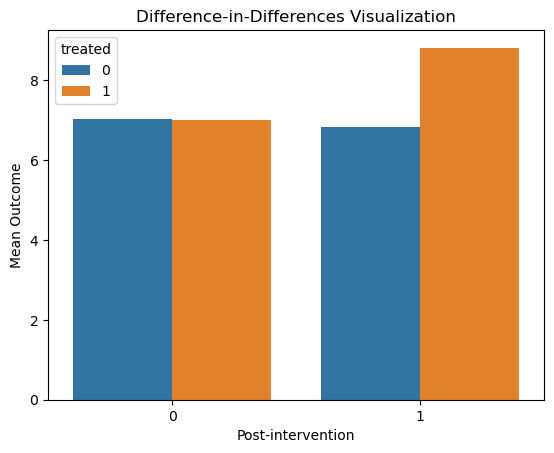

In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# -----------------------------
# 1. Simulate dataset
# -----------------------------
np.random.seed(42)
n = 500
df = pd.DataFrame({
    'household_id': range(1, n+1),
    'psu': np.random.randint(1, 21, n),
    'strata': np.random.randint(1, 6, n),
    'treated': np.random.binomial(1, 0.5, n),
    'post': np.random.binomial(1, 0.5, n),
    'age': np.random.randint(20, 70, n),
    'education_years': np.random.randint(0, 16, n),
    'income': np.random.normal(1000, 300, n),
    'farm_size': np.random.uniform(0.5, 5.0, n),
    'adoption_score': np.random.randint(0, 4, n)
})
df['outcome'] = 2*df['treated']*df['post'] + 0.1*df['age'] + 0.2*df['education_years'] + 0.001*df['income'] + np.random.normal(0, 1, n)
df['adoption_binary'] = (df['adoption_score'] > 0).astype(int)
df['post_treat'] = df['treated']*df['post']

# Save CSV
df.to_csv("simulated_coffee_farmers.csv", index=False)

# -----------------------------
# 2. Descriptive statistics
# -----------------------------
print(df[['income', 'adoption_score', 'farm_size']].describe())
print(pd.crosstab(df['treated'], df['adoption_score'], normalize='index')*100)

# -----------------------------
# 3. Logistic regression for CSA adoption
# -----------------------------
X = df[['treated', 'post', 'age', 'education_years', 'income', 'farm_size']]
X = sm.add_constant(X)
y = df['adoption_binary']

logit_model = sm.Logit(y, X).fit()
print(logit_model.summary())

# -----------------------------
# 4. Difference-in-Differences (DiD)
# -----------------------------
X_did = df[['treated', 'post', 'post_treat', 'age', 'education_years', 'income', 'farm_size']]
X_did = sm.add_constant(X_did)
y_did = df['outcome']

did_model = sm.OLS(y_did, X_did).fit(cov_type='cluster', cov_kwds={'groups': df['psu']})
print(did_model.summary())

# -----------------------------
# 5. Visualization
# -----------------------------
sns.barplot(x='post', y='outcome', hue='treated', data=df, ci=None)
plt.xlabel('Post-intervention')
plt.ylabel('Mean Outcome')
plt.title('Difference-in-Differences Visualization')
plt.show()
